<center> 
    <a href="https://www.visual-layer.com" target="_blank" rel="noopener noreferrer">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo_dark_mode.png" width=200>
    <source media="(prefers-color-scheme: light)" srcset="https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png" width=200>
    <img alt="vl logo." src="https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/visual_layer_logo.png" width=400>
    </picture>
    </a><br>
    <a href="https://github.com/visual-layer/fastdup" target="_blank" style="text-decoration: none;"> GitHub </a> •
    <a href="https://visual-layer.slack.com/" target="_blank" style="text-decoration: none;"> Join Community </a> •
    <a href="https://visual-layer.readme.io/discuss" target="_blank" style="text-decoration: none;"> Discussion Forum </a>
</center>

<center> 
    <a href="https://medium.com/visual-layer" target="_blank" style="text-decoration: none;"> Blog </a> •
    <a href="https://visual-layer.readme.io/" target="_blank" style="text-decoration: none;"> Documentation </a> •
    <a href="https://visual-layer.com/about" target="_blank" style="text-decoration: none;"> About Us </a> 
</center>


<br>

<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://visual-layer.slack.com/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/slack.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
</center>

# Enrich Dataset with Hugging Face Models

[![Open in Colab](https://img.shields.io/badge/Open%20in%20Colab-blue?style=for-the-badge&logo=google-colab&labelColor=gray)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb)
[![Open in Kaggle](https://img.shields.io/badge/Open%20in%20Kaggle-blue?style=for-the-badge&logo=kaggle&labelColor=gray)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb)
[![Explore the Docs](https://img.shields.io/badge/Explore%20the%20Docs-blue?style=for-the-badge&labelColor=gray&logo=read-the-docs)](https://visual-layer.readme.io/docs/enrichment-zero-shot-detection)

This notebook shows how to enrich your image dataset using off the shelve models from Hugging Face hub.

By the end of this notebook, you will learn how to find out if your dataset has issues such as:

+ Use object detection models
+ Use zero shot models
  

## Hugging Face Object Detection Models

First load the models using the `pipeline` API from Hugging Face.


Available models:
- `"facebook/detr-resnet-50" `
- `"microsoft/conditional-detr-resnet-50"`
- `"SenseTime/deformable-detr"` 
- `"jozhang97/deta-swin-large"`
- `"microsoft/table-transformer-detection"` 
- `"hustvl/yolos-tiny"`

In [1]:
from transformers import pipeline

model = "facebook/detr-resnet-50"
detector = pipeline(model=model, task="object-detection", device="cuda")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Load images from folder into a DataFrame using fastdup's builtin function.

In [8]:
import pandas as pd
from tqdm.auto import tqdm

import fastdup
from fastdup.utils import get_images_from_path

fd = fastdup.create(input_dir="/media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k")
filenames = get_images_from_path(fd.input_dir)

filename_df = pd.DataFrame(filenames, columns=["filename"])
filename_df = filename_df.sample(100)
filename_df

filename
79590   /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/processing/step_fastdup/images/thumbnails/27/thumbs_a31b247e-1e49-11ef-b29f-fc3497b6f70f.jpg.webp
101836  /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/processing/step_fastdup/images/thumbnails/10/thumbs_a2a4cab8-1e49-11ef-87c7-fc3497b6f70f.jpg.webp
52222                                            /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/input/images/22/a343a624-1e49-11ef-80b2-fc3497b6f70f.jpg
4081                                    /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/fastdup_report_bbox/crops/imagestrain2017000000016412.jpg_1_52_122_111.jpg
35535                                                                              /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/images/val2017/000000475150.jpg
...                                                                                                                                                                  ...
18139                                                                            /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/images/train2017/000000510020.jpg
89604    /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/processing/step_fastdup/images/thumbnails/9/thumbs_a2218496-1e49-11ef-b6e4-fc3497b6f70f.jpg.webp
36890                                            /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/input/images/26/a30df81c-1e49-11ef-a2b2-fc3497b6f70f.jpg
49678                                            /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/input/images/19/a2c41904-1e49-11ef-a2b2-fc3497b6f70f.jpg
62890                                            /media/dnth/CODE_DATASET2/cocomini/coco_minitrain_25k/work_dir/input/images/13/a24f8daa-1e49-11ef-9e18-fc3497b6f70f.jpg

[100 rows x 1 columns]

Run batch inference on the DataFrame of images using the model.

In [9]:
batch_size = 8
results = []

for start in tqdm(range(0, len(filename_df), batch_size), desc="Batch inference"):
    end = start + batch_size

    batch = filename_df[start:end]
    batch = batch["filename"].tolist()
    res = detector(batch, device="cuda")
    results.extend(res)

Batch inference:   0%|          | 0/13 [00:00<?, ?it/s]

In [21]:
def process_detection_results(
    results: list[list], filename_df: pd.DataFrame
) -> pd.DataFrame:
    results_dict = {"boxes": [], "labels": [], "scores": []}

    for result in results:
        scores = [item["score"] for item in result]
        labels = [item["label"] for item in result]

        boxes_xyxy = []
        for item in result:
            xmin = item["box"]["xmin"]
            ymin = item["box"]["ymin"]
            xmax = item["box"]["xmax"]
            ymax = item["box"]["ymax"]
            box = (xmin, ymin, xmax, ymax)
            boxes_xyxy.append(box)

        results_dict["boxes"].append(boxes_xyxy)
        results_dict["labels"].append(labels)
        results_dict["scores"].append(scores)

    results_df = pd.DataFrame(results_dict)

    filename_df = filename_df.reset_index(drop=True)
    results_df = pd.concat([filename_df, results_df], axis=1)

    return results_df


results_df = process_detection_results(results, filename_df)

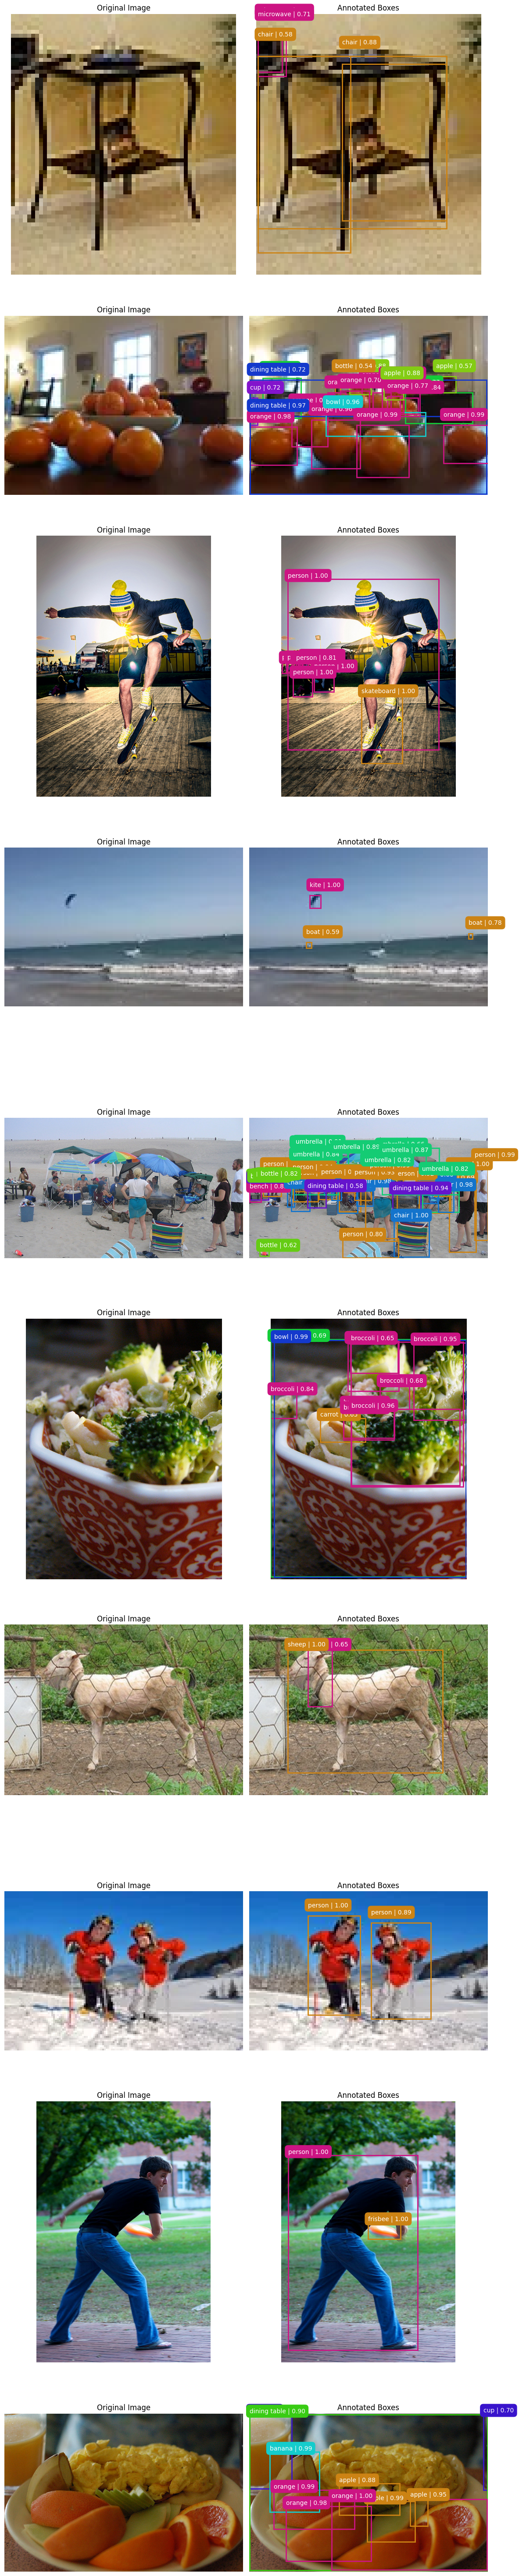

In [22]:
from fastdup.models_utils import plot_annotations

plot_annotations(
    results_df.sample(10),
    image_col="filename",
    bbox_col="boxes",
    scores_col="scores",
    labels_col="labels",
    num_rows=10,
)

In [ ]:
# from transformers import pipeline

# detector = pipeline(model="google/owlv2-base-patch16-ensemble", task="zero-shot-object-detection", device="cuda")
# detector("https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png", candidate_labels=["human face", "parrot", "nasa badge", "star-spangled banner"], device="cuda")


# # without batching
# from tqdm.auto import tqdm

# results = []

# for row in tqdm(df.itertuples(), total=len(df)):
#     filename = row.filename
#     res = detector(filename, candidate_labels=["human face", "car", "giraffe", "bike"], device="cuda")
#     results.append(res)


<center> 
<div style="text-align: center; margin-top:50px;">
    <a href="https://visual-layer.com/" style="padding:10px;">
                <img alt="site" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/web.png" width="50"></a>
    <a href="https://medium.com/visual-layer" style="padding:10px;">
                <img alt="blog" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/forum.png" width="50"></a>
    <a href="https://github.com/visual-layer/fastdup" style="padding:10px;">
                <img alt="github" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/github.png" width="50"></a>
    <a href="https://visual-layer.slack.com/" style="padding:10px;">
                <img alt="slack" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/slack.png" width="50"></a>
    <a href="https://www.linkedin.com/company/visual-layer/" style="padding:10px;">
                <img alt="linkedin" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/linkedin.png" width="50"></a>
    <a href="https://www.youtube.com/@visual-layer" style="padding:10px;">
                <img alt="youtube" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/youtube.png" width="50"></a>
    <a href="https://twitter.com/visual_layer" style="padding:10px;">
                <img alt="twitter" src="https://vl-blog.s3.us-east-2.amazonaws.com/imgs/x.png" width="50"></a>
</div>
<br>
<div style="text-align:center; font-family:'DM Sans',sans-serif; font-style:italic; font-size:12px; max-width:600px; margin: 20px auto auto;">
    <img style="width:200px" alt="logo" src="https://d2iycffepdu1yp.cloudfront.net/design-assets/VL_horizontal_logo.png" width=300>
    <div style="margin-top:20px;">Copyright © 2024 Visual Layer. All rights reserved.</div>
</div>

</center> 